# Practica 1: Análisis de datos
#### Antonio Gómez Vergara ([a.gomezve@alumnos.urjc.es](mailto:a.gomezve@alumnos.urjc.es))
***
#### Parte 1:  Análisis exploratorio.
Para esta primera parte, primero se ha realizado con el data set de *dataset_Facebook.csv* y posteriormente con *winequality-white.csv*.
Para empezar, vamos a importar todas las librerías que vamos a utilizar y a leer el primer data set.

In [105]:
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import numpy as np
import pandas as pd
data = pd.read_csv("dataset_Facebook.csv", delimiter=',')
#Como no interesan de momento, eliminamos los datos categoricos, pero los guardamos por si acaso

del data["Type"]
del data["Category"]

Como primera aproximación, se nos pide calcular el número de muestras así como el de características.

In [106]:
numSamples = len(data.index)
numFeatures = len(data.columns)
print("Hay " + str(numSamples) + " observaciones y " + str(numFeatures) + " caracteristicas.")

Hay 500 observaciones y 17 caracteristicas.


Podemos ver qué características hay en nuestro data set e información adicional como estadísticos, máximos y mínimos, etcétera.

In [107]:
data.describe()

,Page total likes,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,500.000000,500.000000,500.000000,500.000000,499.000000,500.00000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,499.000000,496.000000,500.000000
mean,123194.176000,7.038000,4.150000,7.840000,0.278557,13903.36000,29585.94800,920.344000,798.772000,1415.130000,16766.376000,6585.488000,609.986000,7.48200,177.945892,27.266129,212.120000
std,16272.813214,3.307936,2.030701,4.368589,0.448739,22740.78789,76803.24667,985.016636,882.505013,2000.594118,59791.023731,7682.009405,612.725618,21.18091,323.398742,42.613292,380.233118
min,81370.000000,1.000000,1.000000,1.000000,0.000000,238.00000,570.00000,9.000000,9.000000,9.000000,567.000000,236.000000,9.000000,0.00000,0.000000,0.000000,0.000000
25%,112676.000000,4.000000,2.000000,3.000000,0.000000,3315.00000,5694.75000,393.750000,332.500000,509.250000,3969.750000,2181.500000,291.000000,1.00000,56.500000,10.000000,71.000000
50%,129600.000000,7.000000,4.000000,9.000000,0.000000,5281.00000,9051.00000,625.500000,551.500000,851.000000,6255.500000,3417.000000,412.000000,3.00000,101.000000,19.000000,123.500000
75%,136393.000000,10.000000,6.000000,11.000000,1.000000,13168.00000,22085.50000,1062.000000,955.500000,1463.000000,14860.500000,7989.000000,656.250000,7.00000,187.500000,32.250000,228.500000
max,139441.000000,12.000000,7.000000,23.000000,1.000000,180480.00000,1110282.00000,11452.000000,11328.000000,19779.000000,1107833.000000,51456.000000,4376.000000,372.00000,5172.000000,790.000000,6334.000000


La característica *Type* no es numérica por eso se ha codificado con números del 5 al 8 ya que del 1 al 4 están en la característica *Category*, esta característica viene explicada junto con las demás en la tabla más abajo.
Dando un vistazo rápido, parece ser que prácticamente todas las características son importantes, siempre dependiendo de la salida que queramos obtener.
Para saber si la característica es útil o no necesitamos saber qué es cada característica:


Caracteristica | Descripcion
-------------- | -----------
Category | Caracterización del contenido: si era una oferta o concurso (1), producto (2) o anuncio (3).
Page total likes | Número de personas total que ha interactuado con la página de la compañía.
Post Month | Mes en el que el post ha sido publicado (1 - 12).
Post Weekday | Día de la semana en el que el post ha sido publicado (1 - 7).
Post Hour | Hora en el que el post ha sido publicado (0 - 23).
Paid | Si la compañía ha pagado a Facebook por anunciarlo.
Lifetime Post Total Reach | Número de veces que el post ha sido visto por usuarios únicos.
Lifetime Post Total Impressions | Número total de impresiones, es decir, si el post se ha visto por un anuncio y más tarde si un amigo del usuario lo ha compartido se cuentan como independientes.
Lifetime Engaged Users | Número de veces que un usuario ha pinchado en alguna parte de la publicación (usuarios únicos).
Lifetime Post Consumers | Número de veces que un usuario ha pinchado en alguna parte de la publicación.
Lifetime Post Consumptions | Número de veces que se ha pinchado en alguna parte de la publicación.
Lifetime Post Impressions by people who have liked your Page | Número de impresiones de gente que ha dado "Like" a la publicación. 
Lifetime Post reach by people who like your Page | Número de personas que han visto una publicación dado que han dado "Like" a la página de la compañía (usuarios únicos).
Lifetime People who have liked your Page and engaged with your post | Número de personas que ha dado "Like" a la publicación y ha hecho click en alguna parte de la publicación.
Comment | Número de comentarios de la publicación.
Like | Número de "Likes" de la publicación.
Share | Número de veces que la publicación ha sido compartida.
Type | Tipo de contenido (Photo, Status, Video, Link).
Total Interactions | La suma de comentarios, veces compartido y "Likes" de una publicación.

Continuando con nuestro análisis exploratorio, procedemos a contar cuántos valores *Not a Number* (NaN) hay en todo el data set y en qué caracter

In [15]:
dataNoNaN = data.dropna()
numSamplesNoNaN = len(dataNoNaN.index)
missingValues = numSamples - numSamplesNoNaN
featureHasNAN = data.isnull().sum()
print("Hay " + str(missingValues) + " observaciones que tienen NaN (Not a Number).")
print("Hay " + str(featureHasNAN.sum()) + " NaN en total.")
featuresWithNaN = []
for i in range(0, len(featureHasNAN)-1):
    if featureHasNAN[i] > 0:
        featuresWithNaN += [featureHasNAN.index[i]] 
print("Concretamente hay missing values en: " + str(featuresWithNaN))

Hay 5 observaciones que tienen NaN (Not a Number).
Hay 6 NaN en total.
Concretamente hay missing values en: ['Paid', 'like', 'share']


Vemos que hay pocos NaN en el data set, por lo que podemos utilizar la instrucción *dropna()* para eliminaresas observaciones, con el riesgo que ello conlleva.
Se ha decidido eliminar 5 observaciones antes que las 3 características ya que probablemente aporten más dichas características en 495 observaciones que 16 características para 500 observaciones, pero todo depende de la salida (*output*) que queramos obtener como ya se ha explicado más arriba, es posible que esas 3 características nos sean irrelevantes para un *output* determinado.
Por supuesto otra variante en vez de eliminar esas 5 observaciones podría ser poner los valores *NaN* a 0, por ejemplo.
A continuación vamos a realizar los diagramas de caja para ver si hay valores atípicos (*outliers*):

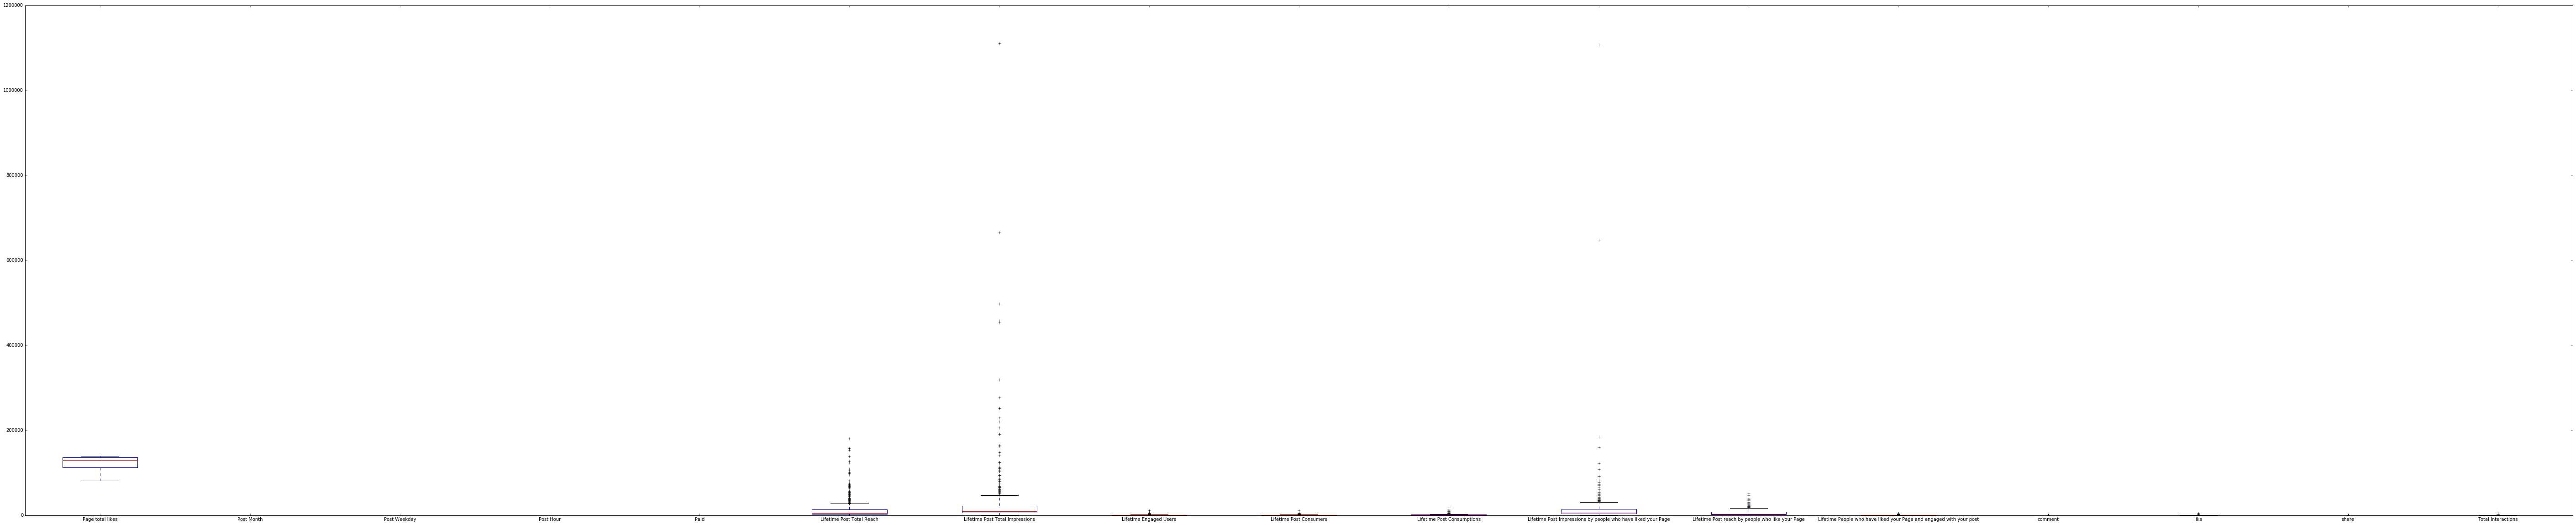

In [16]:
%matplotlib inline
dataNoNaN.plot.box(figsize=(100,20))

Se puede hacer *zoom* en la figura para ver que sí tenemos valores *outliers* para, por ejemplo, la característica *Lifetime Post Total Impressions* ya que dichos valores están por encima del límite máximo del diagrama de caja.
Para continuar, vamos a normalizar los datos y obtener los histogramas y *scatter plots* de dichos datos.
Para normalizar, vamos a coger cada observación del data set y le vamos a restar su media y dividir entre la desviación típica.

In [17]:
dataNoNaNNormalized=(dataNoNaN-dataNoNaN.mean())/dataNoNaN.std()

* Scatter plots:

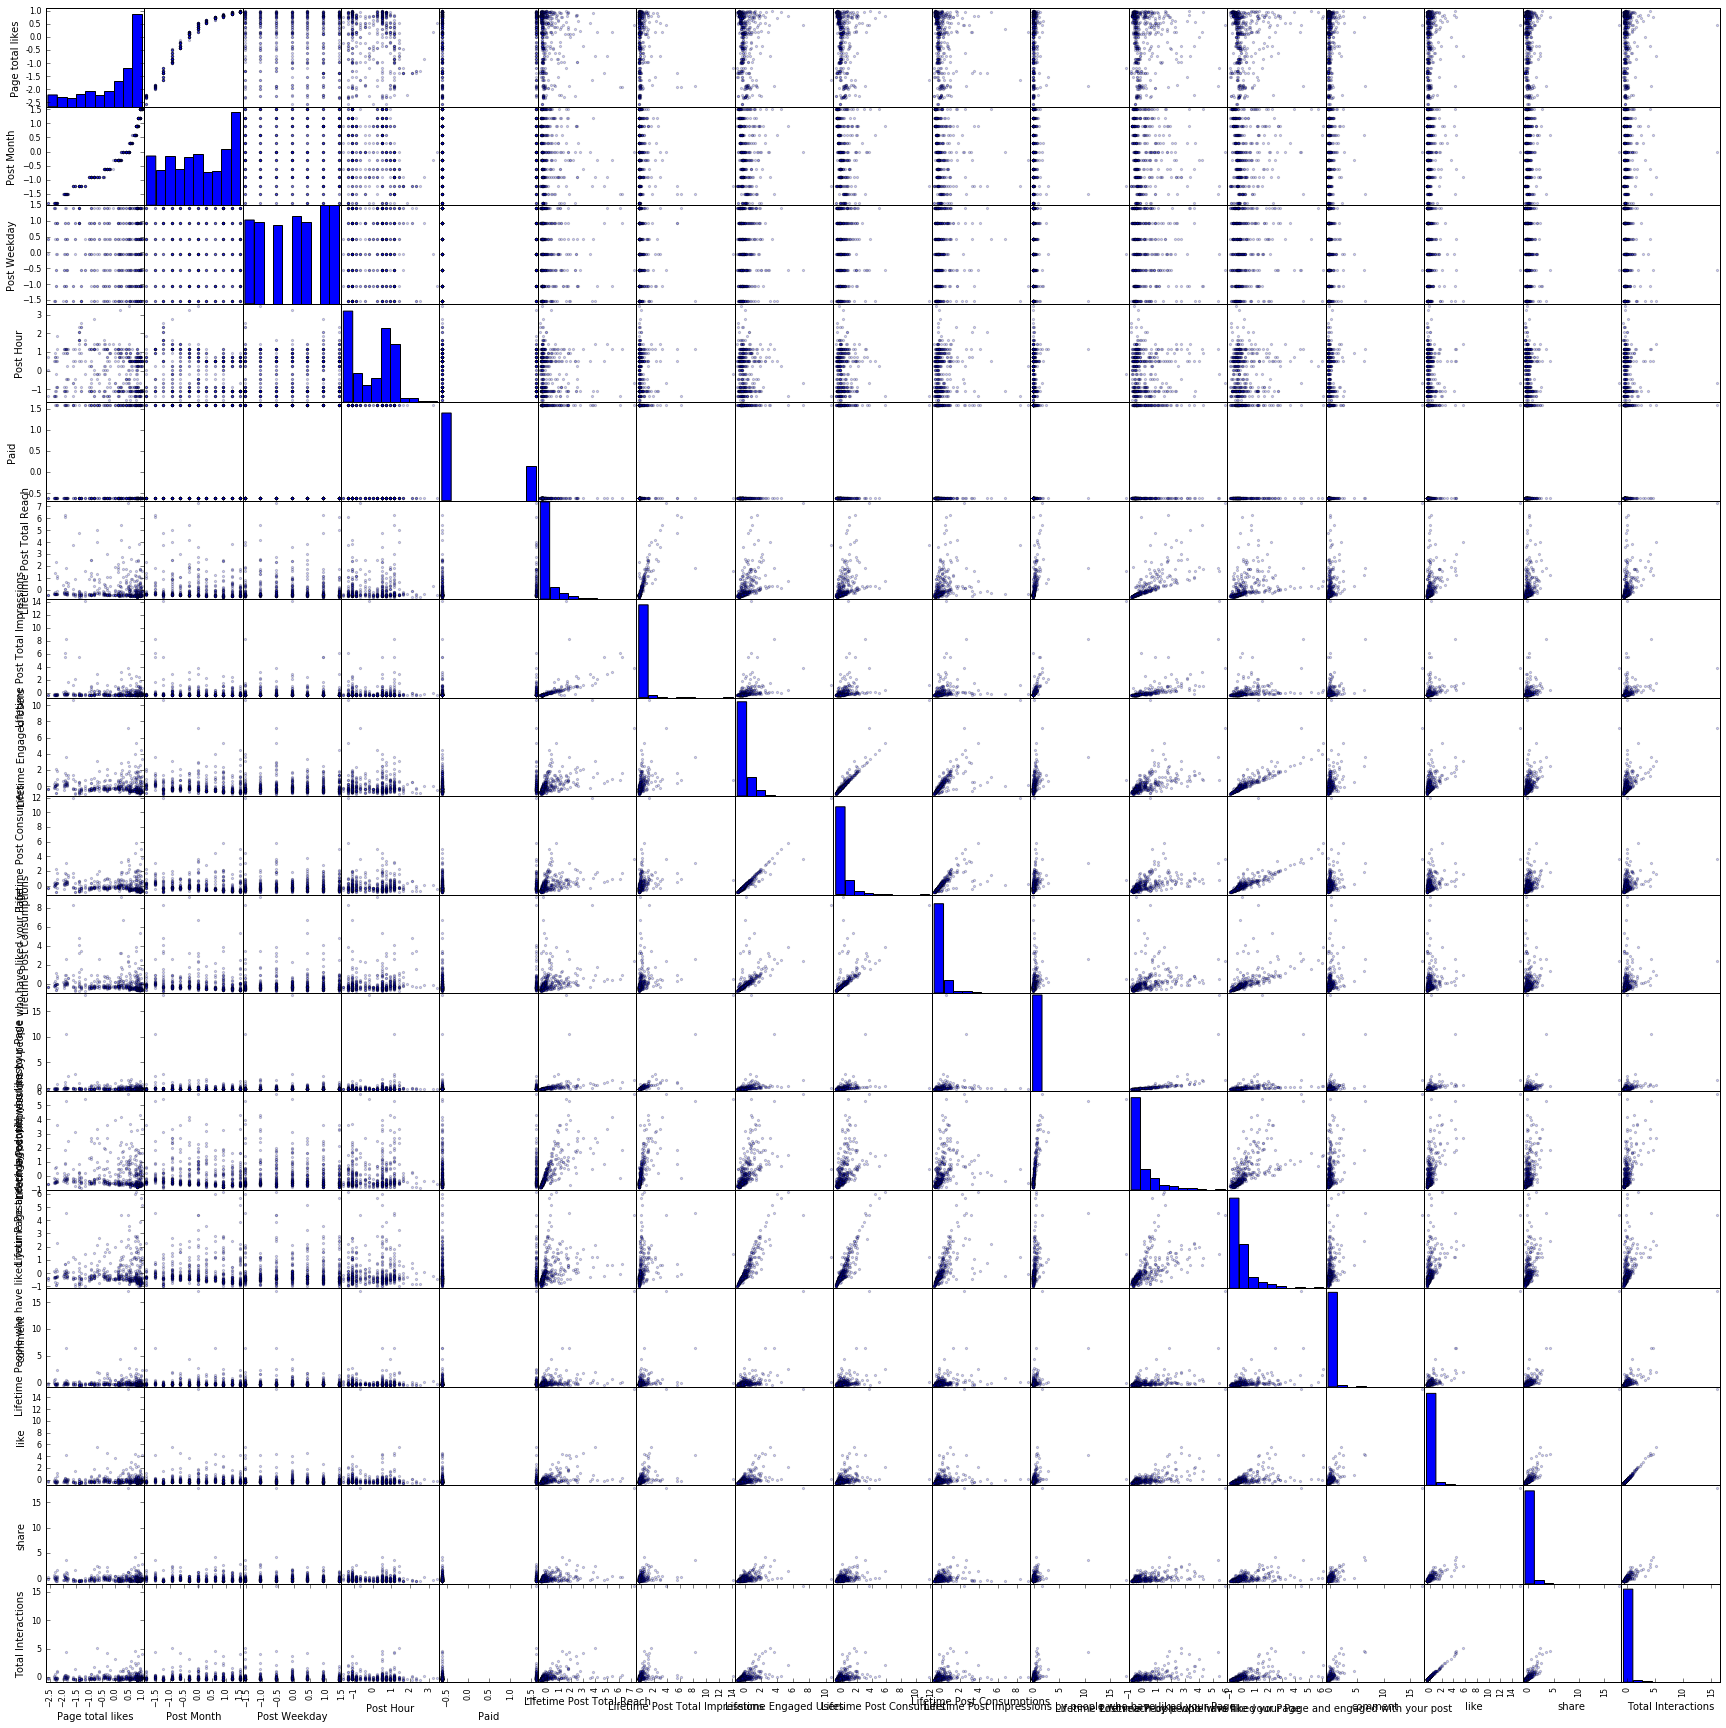

In [18]:
scatterPlotMatrix = scatter_matrix(dataNoNaNNormalized, alpha=0.2, figsize = (30, 30))

Lo que obtenemos de realizar el *scatter plot* es la relación de una (o varias) característica con otras características que podrían servir como *output*.
* Histogramas:

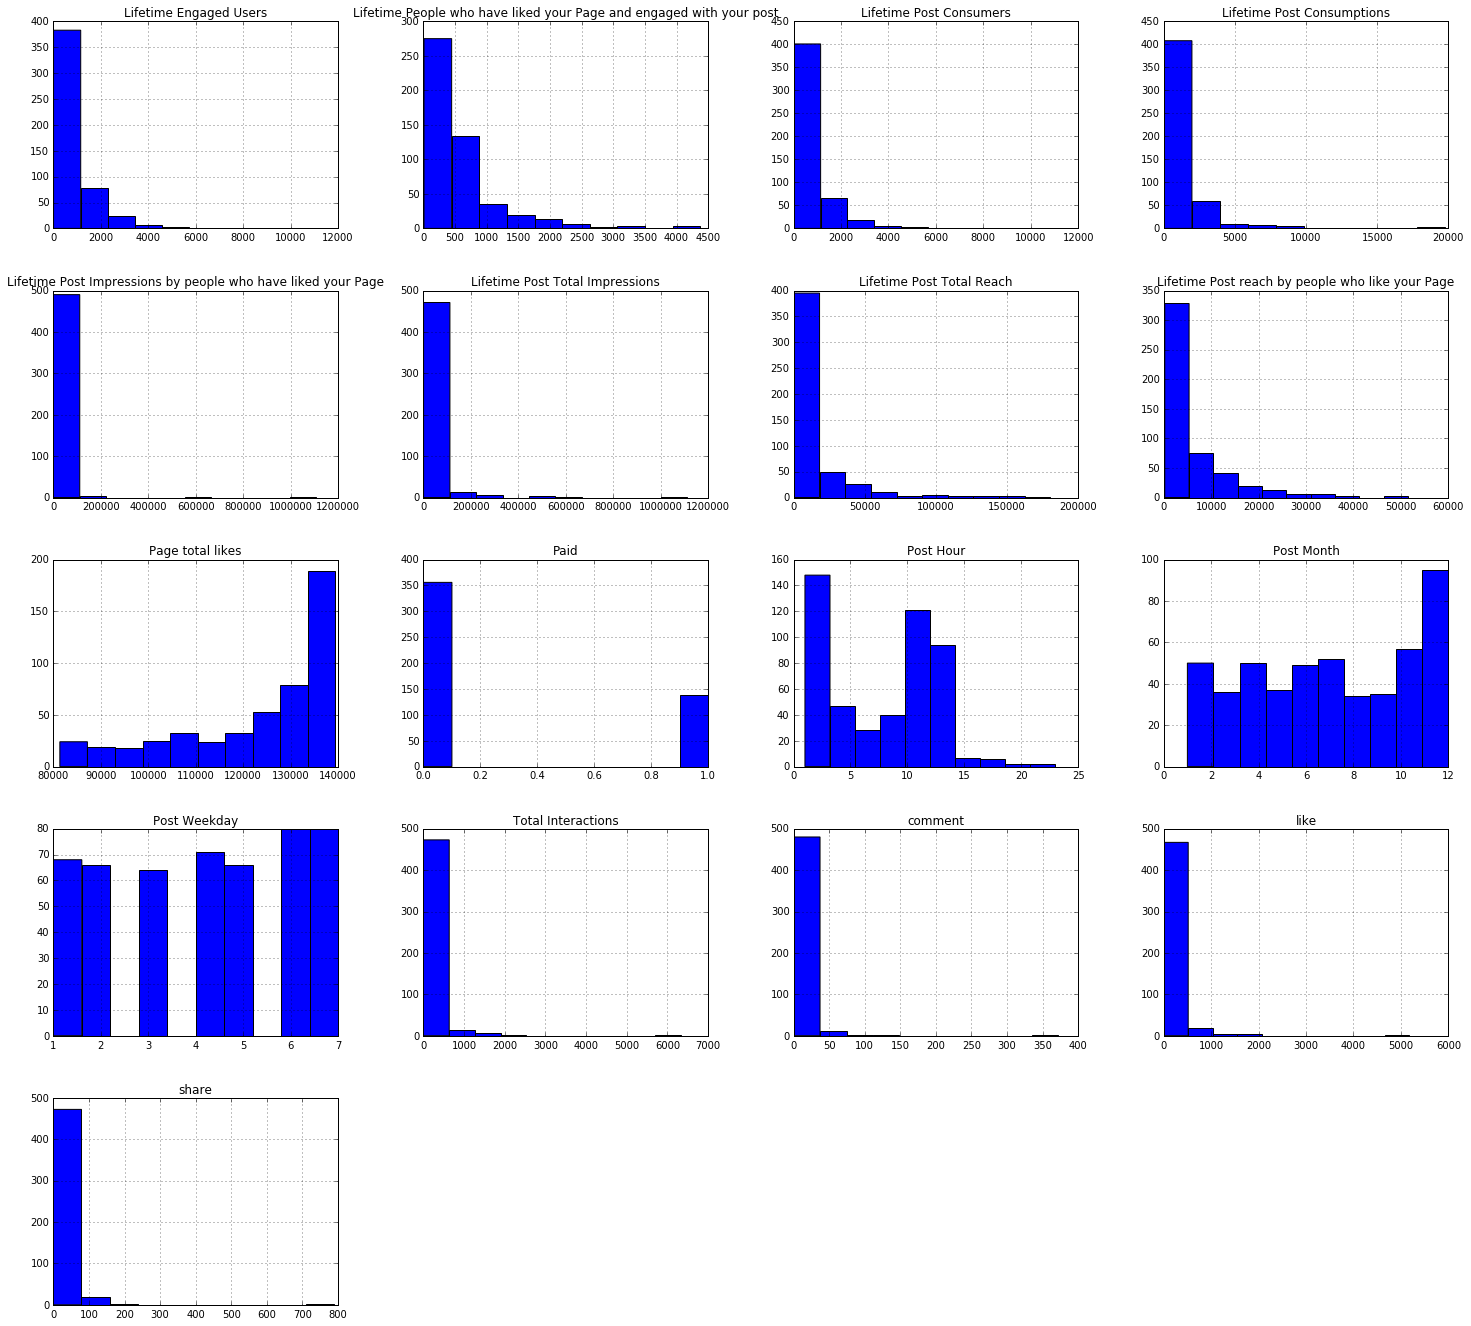

In [19]:
plt.figure()
histogramMatrix = dataNoNaN.hist(figsize=(25,23))

En los histogramas se puede apreciar que el eje X es el valor de una característica y el eje Y es cuántas observaciones con dicho valor de característica hay.
Por ejemplo, si nos fijamos en el histograma de *Post Month* vemos que hay casi 100 observaciones que se han publicado en el mes de Diciembre.
Podemos también sacar las correlaciones de las características para saber cuáles qué características están altamente relacionadas.

***
#### Parte 2: Regresión lineal simple.
Realizado nuestro análisis exploratorio de los datos, vamos a proceder a la selección de características, selección de variable dependiente e independiente, etcétera.
Para el data set de Facebook, podemos ver que la variable dependiente puede ser *Y*, una nueva *feature* que nos dice si una publicación va a ser óptima según el número de me gusta que obtenga, por ejemplo si tiene 300 o más.
Podemos calcular la correlación de dicha variable *Y*:

In [85]:
dataNoNaNNormalized["Y"] = np.where(dataNoNaN["like"] >= 300, 1, 0)
corr = dataNoNaNNormalized.corr()["Y"]
corr

Page total likes                                                       0.102686
Post Month                                                             0.089205
Post Weekday                                                          -0.033895
Post Hour                                                             -0.068764
Paid                                                                   0.103079
Lifetime Post Total Reach                                              0.354701
Lifetime Post Total Impressions                                        0.205513
Lifetime Engaged Users                                                 0.392300
Lifetime Post Consumers                                                0.264744
Lifetime Post Consumptions                                             0.174652
Lifetime Post Impressions by people who have liked your Page           0.179251
Lifetime Post reach by people who like your Page                       0.541648
Lifetime People who have liked your Page

Como sabemos, la correlación varía en el rango de valores [0,1]:
* Si el valor es positivo y es alto o 1, quiere decir que dichas características están relacionadas linealmente, es decir, cuando una aumenta de valor, la otra también aumenta.
* Si el valor es negativo y es alto o -1, quiere decir que dichas características están relacionadas linealmente pero a la inversa, es decir, cuanto más aumenta una, más disminuye la otra.

Como se puede apreciar, hay una cierta correlación (mayor de 0.3) con las características:*Lifetime Post Total Reach*, *Lifetime Engaged Users*, *Lifetime Post Consumers*, *Lifetime People who have liked your Page and engaged with your post*, *like*, *share*, *Lifetime Post reach by people who like your Page* y *Total Interactions*.

Vamos ahora a separar el data set en dos conjuntos: *training* y *test*, primero aleatorizando el conjunto de observaciones.

In [94]:
shuffledData = dataNoNaNNormalized.sample(frac=1)

Teniendo las muestras aleatorizadas nos queda seleccionar la característica que más aportan a la variable dependiente, como ya hemos podido ver en la correlación de *Y* prácticamente se ha elegido sola.
Ahora separaremos las características en nuestras dos variables: *X* e *Y*, posteriormente, las separaremos en los dos conjuntos de *training* y *test* y, por último, calcularemos el porcentaje de error que hemos obtenido.

In [95]:
#Eleccion de las muestras
x_var_name_best = []
x_var_name_worst = []
corr = shuffledData.corr()["Y"]
for i in shuffledData:
    if i != "Y":
        if  abs(corr[i]) >= 0.3:
            x_var_name_best += [i]
        if abs(corr[i]) < 0.3:
            x_var_name_worst +=[i]
y_var_name = list(shuffledData)[-1]
#Recopilacion de los valores de las muestras
X_best = shuffledData[x_var_name_best]
X_worst = shuffledData[x_var_name_worst]
Y = shuffledData[y_var_name]

Por suerte en Python existe una librería de *sklearn* para que separe en sendos conjuntos de *training* y *test*.
Este paso podría ser un poco complicado ya que si ponemos la variable *test_size* muy baja, no obtendremos resultados fiables ya que estaremos siendo demasiado optimistas, lo ideal sería regularlo entre un 20%-30%, para que así tengamos un 80%-70% de muestras en el conjunto de *train* y un 20%-30% restante para el conjunto de *test*.

In [96]:
from sklearn.model_selection import train_test_split

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X_best, Y, test_size=0.3, random_state=0)

print ("Matriz de train: " + str(X_train_b.shape))
print ("Matriz de test: " + str(X_test_b.shape))

Matriz de train: (346, 8)
Matriz de test: (149, 8)


Por último, nos queda elegir nuestro modelo de regresión lineal, crearlo, entrenarlo y hacer la predicción, esta vez no ajustaremos sus parámetros (que se pueden ver haciendo *print*). Pueden parecer muchos pasos, pero en realidad sólo son unas cuantas líneas de código más.

In [97]:
from sklearn.linear_model import LinearRegression

lin_reg_b = LinearRegression()

lin_reg_b.fit(X_train_b, y_train_b)
print lin_reg_b

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


Por último, con regresión lineal, hacemos la predicción y calculamos el porcentaje de error.
Por otro lado, también podemos ver el porcentaje de error con la característica que menos aporte en este *output* que posteriormente ya hemos buscado.

In [98]:
y_pred_b = lin_reg_b.predict(X_test_b)

from sklearn.metrics import mean_squared_error
acc_best = mean_squared_error(y_test_b, y_pred_b)
print "El porcentaje de error con las mejores caracteristicas es: " + str(acc_best)
print "Con coeficientes: " + str(lin_reg_b.coef_)
#Con la peor caracteristica
print ""
print "Peores caracteristicas: " + str(x_var_name_worst)
X_train_w, X_test_w, y_train_w, y_test_w = train_test_split(X_worst, Y, test_size=0.3, random_state=0)
#Modelo
lin_reg_w = LinearRegression()
lin_reg_w.fit(X_train_w, y_train_w)
#Prediccion
y_pred_w = lin_reg_w.predict(X_test_w)
#Precision
acc_worst = mean_squared_error(y_test_w, y_pred_w)
print "El porcentaje de error con las peores caracteristica es: " + str(acc_worst)
print "Con coeficientes: " + str(lin_reg_w.coef_)

El porcentaje de error con las mejores caracteristicas es: 0.0889775780512
Con coeficientes: [-0.08563663 -0.02773771  0.12170179  0.02807099 -0.16294539  0.18359643
 -0.03312702  0.14326566]

Peores caracteristicas: ['Page total likes', 'Post Month', 'Post Weekday', 'Post Hour', 'Paid', 'Lifetime Post Total Impressions', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page']
El porcentaje de error con las peores caracteristica es: 0.133518433895
Con coeficientes: [ 0.07040255 -0.02932878 -0.006745   -0.01850799  0.00698433  0.02863035
  0.13498614 -0.01590709  0.00410913]


Como vemos, el porcentaje de error es aceptable, con un 0.0889 de error, podemos predecir si la siguiente publicación que se haga en Facebook tendrá me gusta o no, independientemente del número que tenga.

Por otro lado tenemos un porcentaje de error con las peores características de un 0.1335, se ha aumentado el error producido, puede no ser demasiado para este data set, pero es posible que ese error sea un problema.

Por último, vamos a utilizar *clustering* y el algoritmo de K-medias. Se utiliza todo el dataset y, posteriormente, representamos los centroides asociados a las *features* que queremos.

In [99]:
from sklearn.cluster import KMeans

y_true = shuffledData["Y"]
del shuffledData["Y"]

kmeans = KMeans(n_clusters=2, random_state=0).fit(shuffledData)
labels = kmeans.predict(shuffledData)

Procedemos a calcular qué centroides hemos obtenido y qué *features* nos interesa representar.

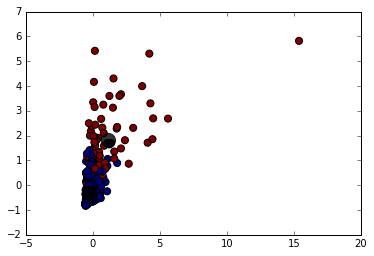

In [100]:
w = 0
z = 0
for i in shuffledData:
    if i != "like":
        w += 1
    else:
        break
for i in shuffledData:
    if i != "Lifetime Post reach by people who like your Page":
        z += 1    
    else:
        break
plt.scatter(np.float64(shuffledData["like"]), np.float64(shuffledData["Lifetime Post reach by people who like your Page"]), s=50, c=labels);
centers = kmeans.cluster_centers_
plt.scatter(centers[:, w], centers[:, z], c='black', s=200, alpha=0.8);


En la imagen están representadas las *features*: *like* y *Lifetime Post reach by people who like your Page* una frente a otra.
Se observa que tenemos dos centroides divididos según el color de su etiqueta:
* Etiqueta roja para las publicaciones que no son consideradas óptimas, es decir, no tienen un número de me gusta óptimo (valor 0 en las etiquetas).
* Etiqueta azul para las publicaciones que sí son consideradas óptimas, es decir, tienen un número de me gusta óptimo (valor 1 en las etiquetas).

Procedemos a calcular el SSE.

In [101]:
acc_clust = mean_squared_error(y_true, labels)
print "Con clustering, obtengo un SSE de: " + str(acc_clust)

Con clustering, obtengo un SSE de: 0.117171717172


***
#### Parte 3: Principal component analysis (PCA).

Vamos a utilizar PCA para ver su funcionamiento y qué nos aporta su utilización.
Para ello, vamos a utilizar la variable *n_components* que según la documentación de *sklearn* es el mínimo entre el numero de muestras (sin NaN) y el número de características.
Por otro lado, al entrenar el modelo, vamos a utilizar el conjunto de entrenamiento con las mejores características.

In [131]:
from sklearn.decomposition import PCA

components = min(numSamplesNoNaN, numFeatures)
pca = PCA(n_components = components)
pca.fit(shuffledData)
print("Coeficientes que mas peso aportan: " + str(pca.explained_variance_ratio_))

Coeficientes que mas peso aportan: [  3.88507435e-01   1.34259418e-01   1.02070006e-01   9.56649399e-02
   6.23973844e-02   5.89932740e-02   5.25317147e-02   3.57503048e-02
   2.67592419e-02   1.81294018e-02   9.40730794e-03   6.81127019e-03
   4.61401393e-03   3.27633280e-03   7.96907206e-04   3.10474535e-05
   9.42715928e-33]


Podemos comprobar que los valores más grandes (los 2 o 3 primeros) son los que más aportan a las características elegidas.
Vamos a representar con KPCA (Kernel PCA) y comparar con clustering.

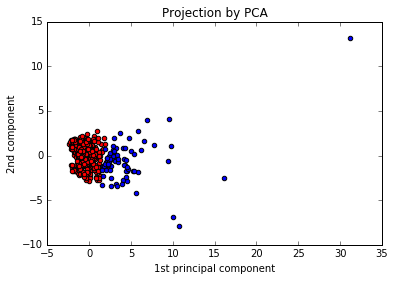

In [128]:
from sklearn.decomposition import KernelPCA

reds = labels == 0
blues = labels == 1

X_pca = pca.fit_transform(shuffledData)
plt.scatter(X_pca[reds, 0], X_pca[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X_pca[blues, 0], X_pca[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.title("Projection by PCA")
plt.xlabel("1st principal component")
plt.ylabel("2nd component")

Se puede ver cómo PCA ha separado las muestras (*labels*) de clustering en dos conjuntos, es decir, podemos dibujar la recta que separa los dos grupos de muestras siguiendo los mismos colores que los utilizados en clustering.
Por lo tanto sabemos que clustering se está realizando correctamente, ya que en un principio no tendríamos forma de conocer si los datos están siendo asignados correctamente o no.